# Playground

In [1]:
import wandb
import torch
import seaborn_image as isns
from pathlib import Path

from uda import UNetConfig, UNet, CC359, CC359Config, HParams
from uda.utils import reshape_to_volume

device = "cuda:0" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

files_dir = Path("/tmp/files")
data_dir = Path("/tmp/data/CC359")
run_id = "2fhks8qr"

Using device: cuda:0


In [2]:
wandb.restore("config/cc359.yml", f"tiser/UDA/{run_id}", root=files_dir)
wandb.restore("config/hparams.yml", f"tiser/UDA/{run_id}", root=files_dir)
wandb.restore("config/unet.yml", f"tiser/UDA/{run_id}", root=files_dir)

wandb.restore("best_model", f"tiser/UDA/{run_id}", root=files_dir);

In [3]:
dataset_conf = CC359Config.from_file(files_dir / "config/cc359.yml")
hparams = HParams.from_file(files_dir / "config/hparams.yml")

val_dataset = CC359(data_dir, dataset_conf, train=False)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=hparams.val_batch_size, shuffle=False)

Loading files: 100%|██████████| 20/20 [00:04<00:00,  4.45it/s]


In [15]:
unet_conf = UNetConfig.from_file(files_dir / "config/unet.yml")
model = UNet.from_pretrained(files_dir / "best_model", unet_conf)

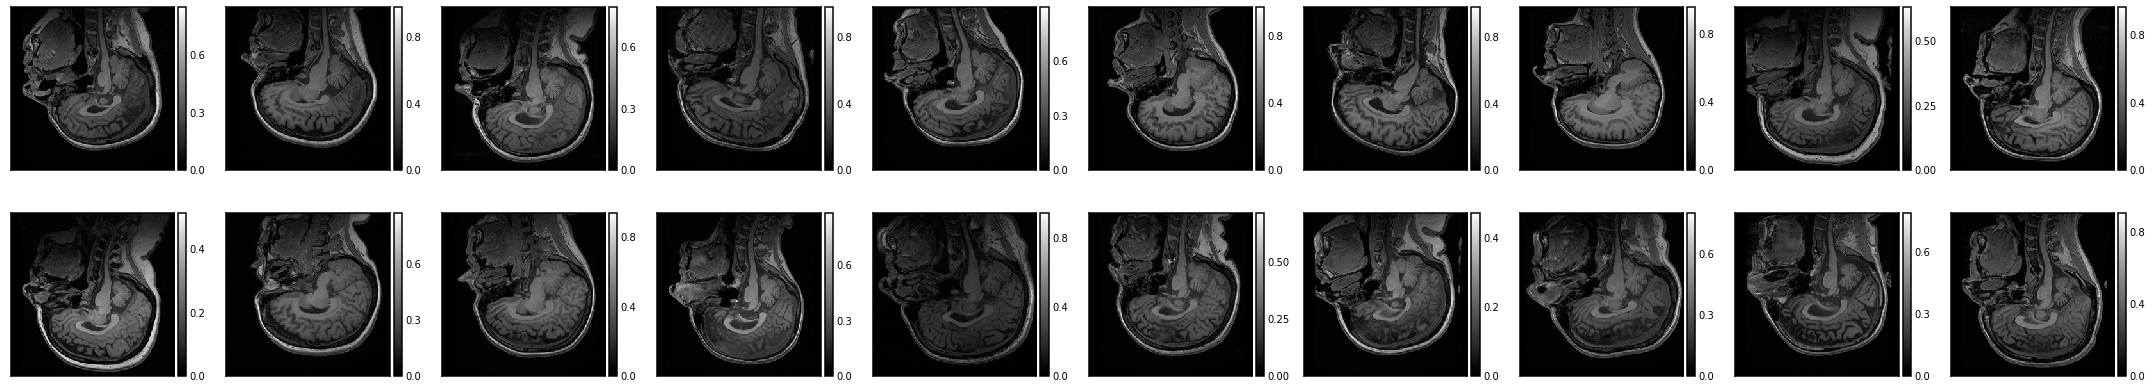

In [4]:
data = reshape_to_volume(val_dataset.data, val_dataset.PADDING_SHAPE, val_dataset.patch_dims)
isns.ImageGrid(list(data[:, 96]), col_wrap=10, cmap='gray', origin="upper");

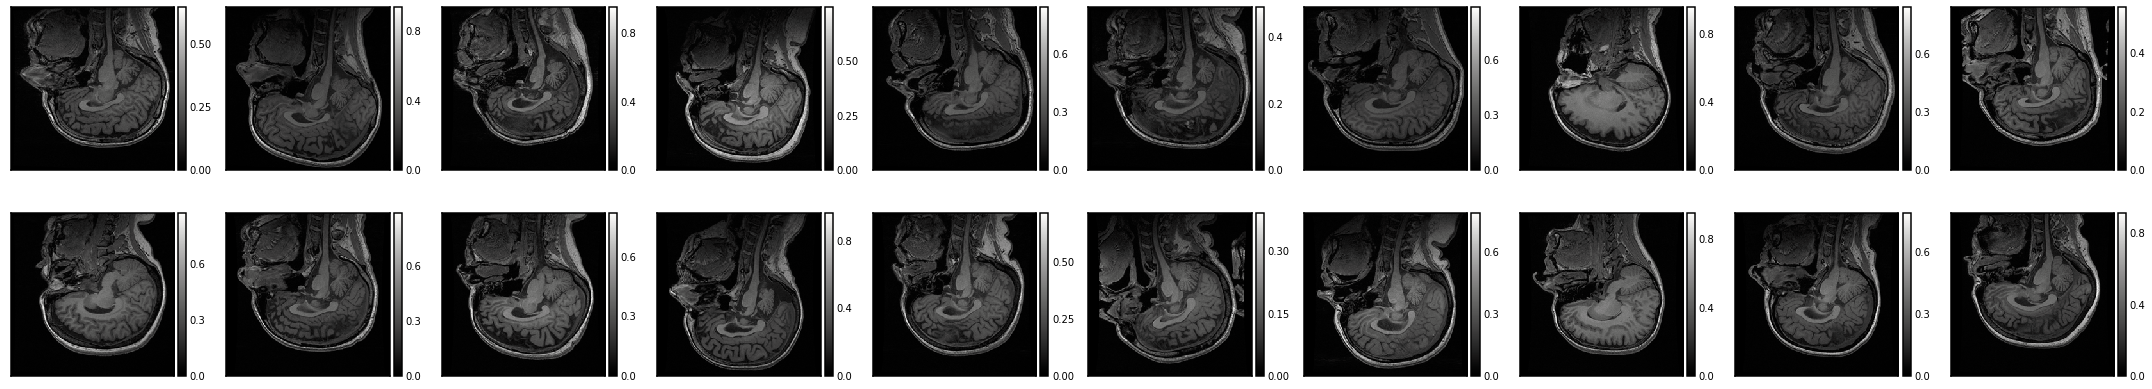

In [7]:
data = reshape_to_volume(val_dataset.data, val_dataset.PADDING_SHAPE, val_dataset.patch_dims)
isns.ImageGrid(list(data[:, 96]), col_wrap=10, cmap='gray', origin="upper");

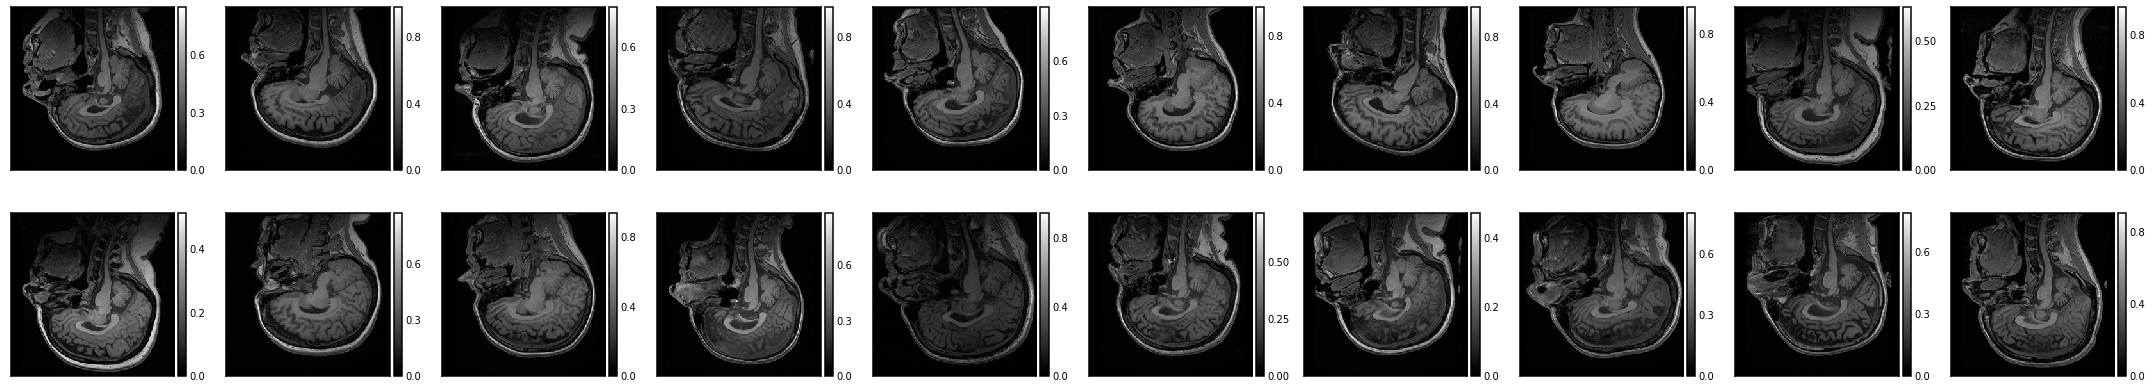

In [26]:
data = torch.stack([torch.load(f"/tmp/outputs/test_img-{i}") for i in range(20)])
isns.ImageGrid(list(data[:, 96]), col_wrap=10, cmap='gray', origin="upper");

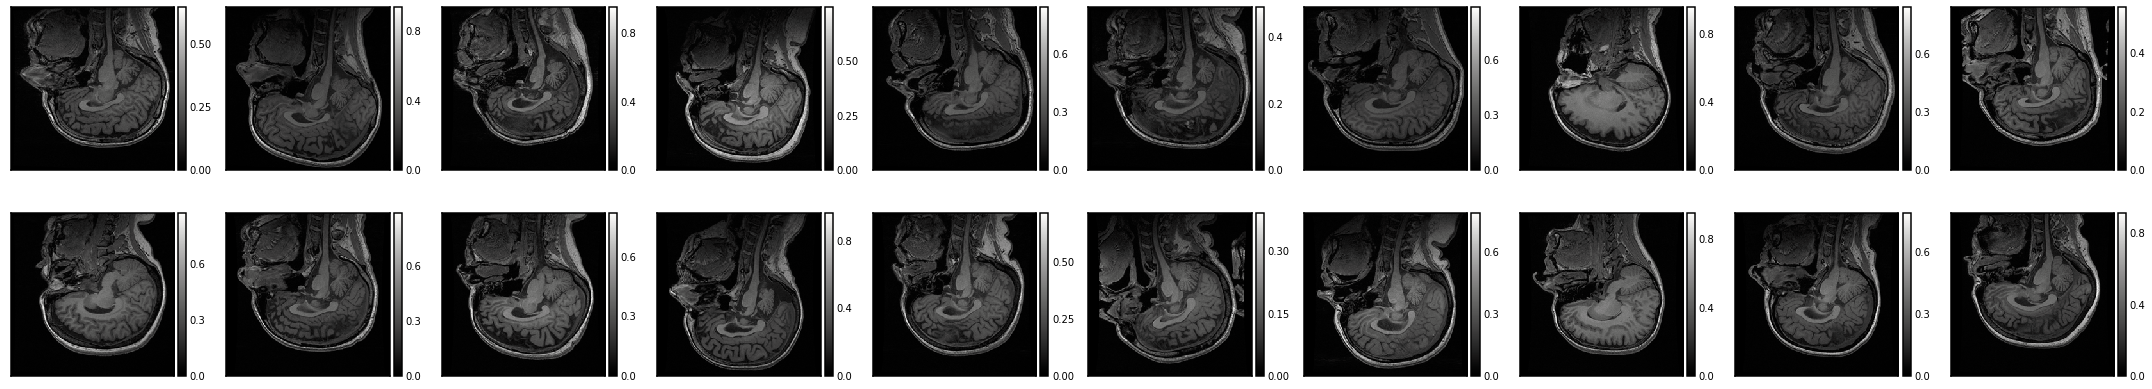

In [2]:
data = torch.stack([torch.load(f"/tmp/outputs/test_img-{i}") for i in range(20)])
isns.ImageGrid(list(data[:, 96]), col_wrap=10, cmap='gray', origin="upper");